In [1]:
import matplotlib.pyplot as plt
import numpy as np

import imageio

from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
img = imageio.imread('shrek.jpg')

In [3]:
img = img.astype(np.float32) / 255
img.shape

(900, 900, 3)

## Увеличение яркости

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


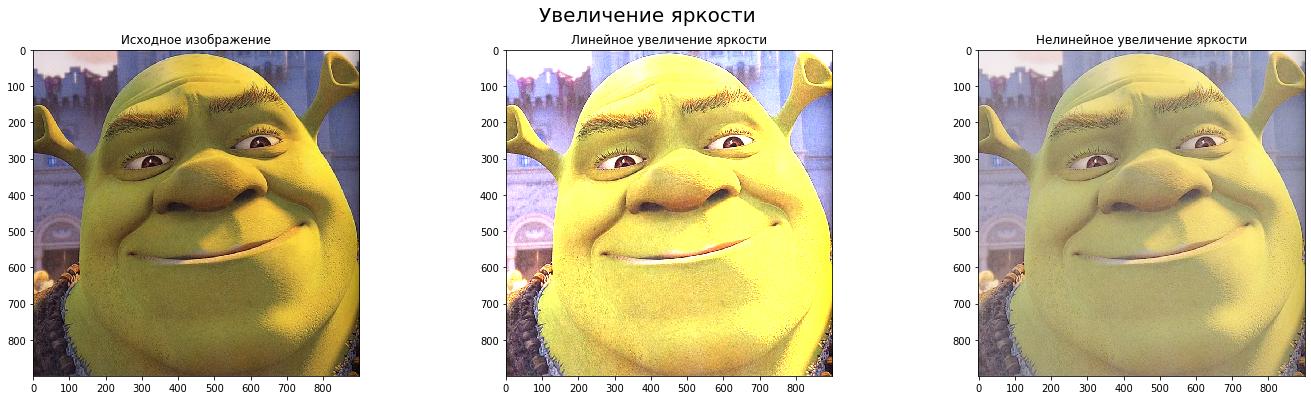

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Увеличение яркости', fontsize=20)

ax1.imshow(img)
ax1.set_title('Исходное изображение')

ax2.imshow(img * 2)
ax2.set_title('Линейное увеличение яркости')

ax3.imshow(img ** 0.5)
ax3.set_title('Нелинейное увеличение яркости');

## Уменьшение яркости

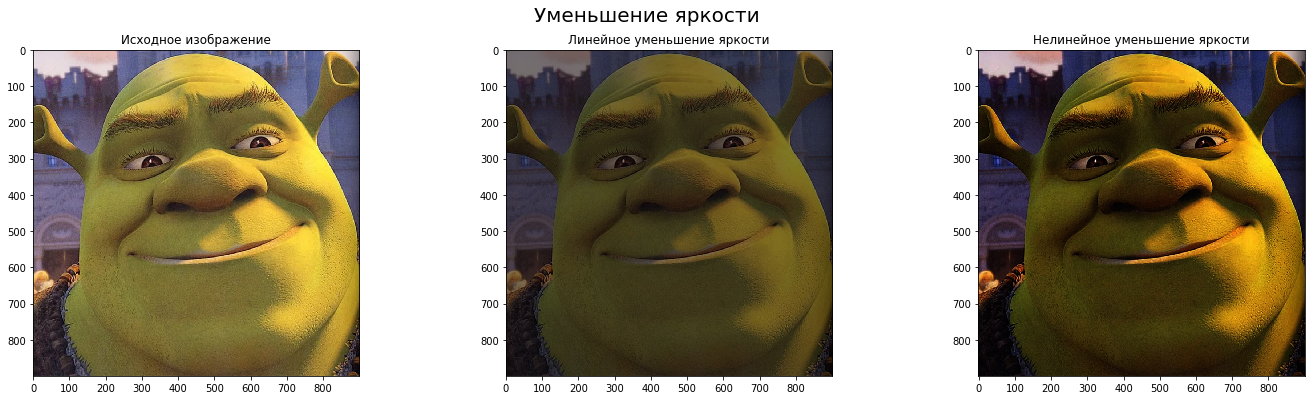

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Уменьшение яркости', fontsize=20)

ax1.imshow(img)
ax1.set_title('Исходное изображение')

ax2.imshow(img / 2)
ax2.set_title('Линейное уменьшение яркости')

ax3.imshow(img ** 2)
ax3.set_title('Нелинейное уменьшение яркости');

## Перевод в цветовое пространство HSV

In [6]:
from skimage.color import rgb2hsv, hsv2rgb

In [7]:
img_hvs = rgb2hsv(img)

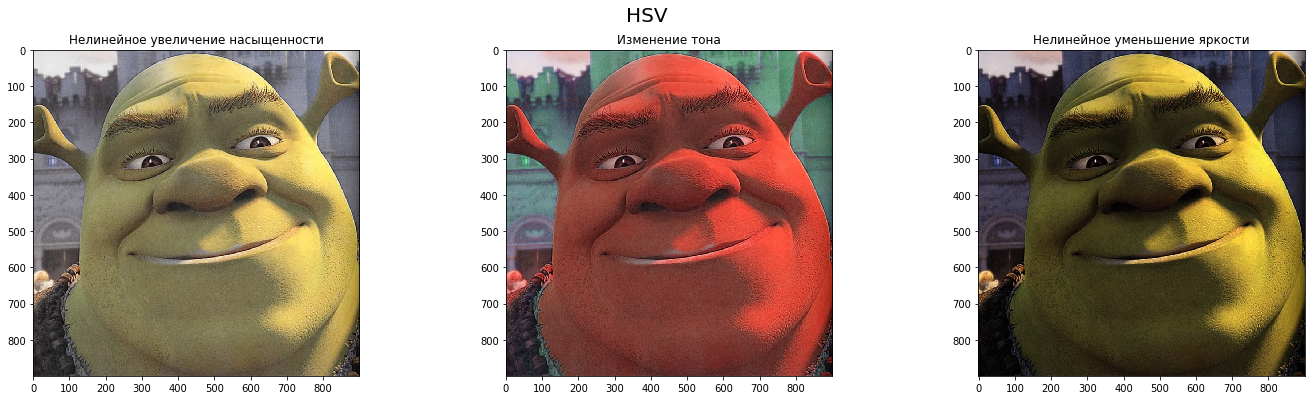

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('HSV', fontsize=20)

img_hvs_new = np.copy(img_hvs)
img_hvs_new[:, :, 1] **= 2
ax1.imshow(hsv2rgb(img_hvs_new))
ax1.set_title('Нелинейное увеличение насыщенности')

img_hvs_new = np.copy(img_hvs)
img_hvs_new[:, :, 0] **= 2
ax2.imshow(hsv2rgb(img_hvs_new))
ax2.set_title('Изменение тона')

img_hvs_new = np.copy(img_hvs)
img_hvs_new[:, :, 2] **= 2
ax3.imshow(hsv2rgb(img_hvs_new))
ax3.set_title('Нелинейное уменьшение яркости');

## Бинаризация по порогу

In [9]:
img_bw = np.mean(img, axis=2)

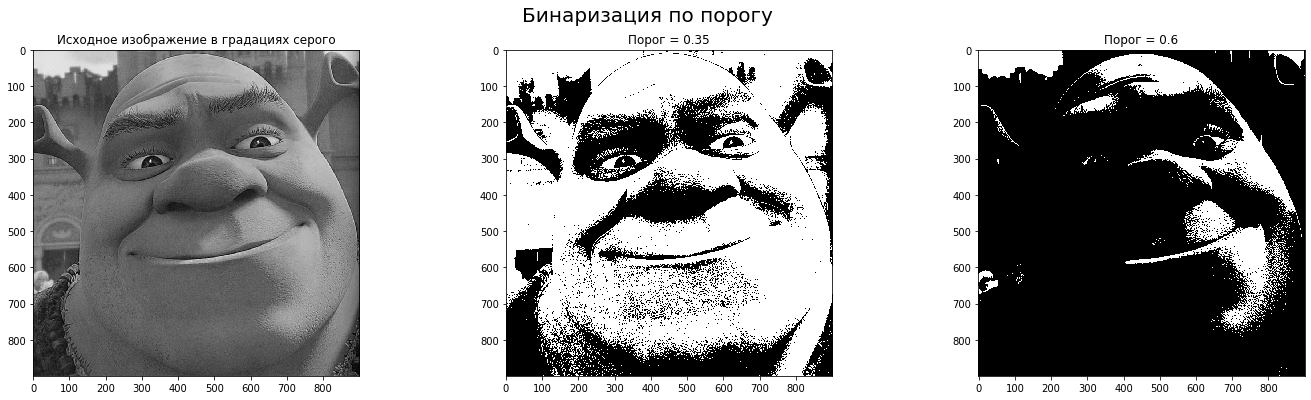

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Бинаризация по порогу', fontsize=20)

ax1.imshow(img_bw, cmap='gray')
ax1.set_title('Исходное изображение в градациях серого')

threshold = 0.35
ax2.imshow((img_bw > threshold).astype(np.uint8), cmap='gray')
ax2.set_title(f'Порог = {threshold}')

threshold = 0.6
ax3.imshow((img_bw > threshold).astype(np.uint8), cmap='gray')
ax3.set_title(f'Порог = {threshold}');

## Размытие

In [11]:
def my_filter(x):
    return np.mean(x)

In [12]:
win_size = (25, 25)

out_img = np.zeros(
                    (img.shape[0] - win_size[0] + 1,
                    img.shape[1] - win_size[1] + 1,
                    3),
                    dtype=np.float32)

In [13]:
for i in tqdm_notebook(range(out_img.shape[0])):
    for j in range(out_img.shape[1]):
        for c in range(3):
            x = img[i:i + win_size[0], j:j + win_size[1], c]
            out_img[i,j,c] = my_filter(x)

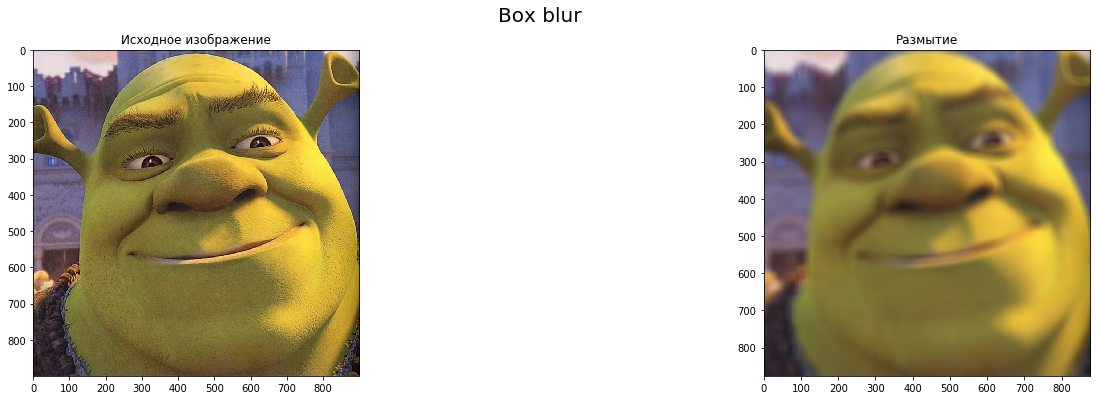

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))

f.suptitle('Box blur', fontsize=20)

ax1.imshow(img)
ax1.set_title('Исходное изображение')

ax2.imshow(out_img)
ax2.set_title('Размытие');

## Свертка

In [15]:
def box_blur(height, width):
    win_size = (height, width)
    w = np.ones(win_size, dtype=np.float32)
    return w / np.sum(w)

In [16]:
def gaussian_blur(height, width):
    win_size = (height, width)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(- (i - w.shape[0]//2) ** 2 / 2
                            - (i - w.shape[1]//2) ** 2 / 2)


    return w / np.sum(w)

In [17]:
out_img_box = np.zeros(
                    (img.shape[0] - win_size[0] + 1,
                    img.shape[1] - win_size[1] + 1,
                    3),
                    dtype=np.float32)

In [18]:
out_img_gaus = np.zeros(
                    (img.shape[0] - win_size[0] + 1,
                    img.shape[1] - win_size[1] + 1,
                    3),
                    dtype=np.float32)

In [19]:
win_size = (20, 20)

In [20]:
w_box = box_blur(*win_size)

In [21]:
w_box.shape

(20, 20)

In [22]:
w_gauss  = gaussian_blur(*win_size)

In [23]:
for i in tqdm_notebook(range(out_img.shape[0])):
    for j in range(out_img.shape[1]):
        for c in range(3):
            x = img[i:i + win_size[0], j:j + win_size[1], c]
            out_img_box[i,j,c] = np.sum(w_box * x)
            out_img_gaus[i,j,c] = np.sum(w_gauss * x)

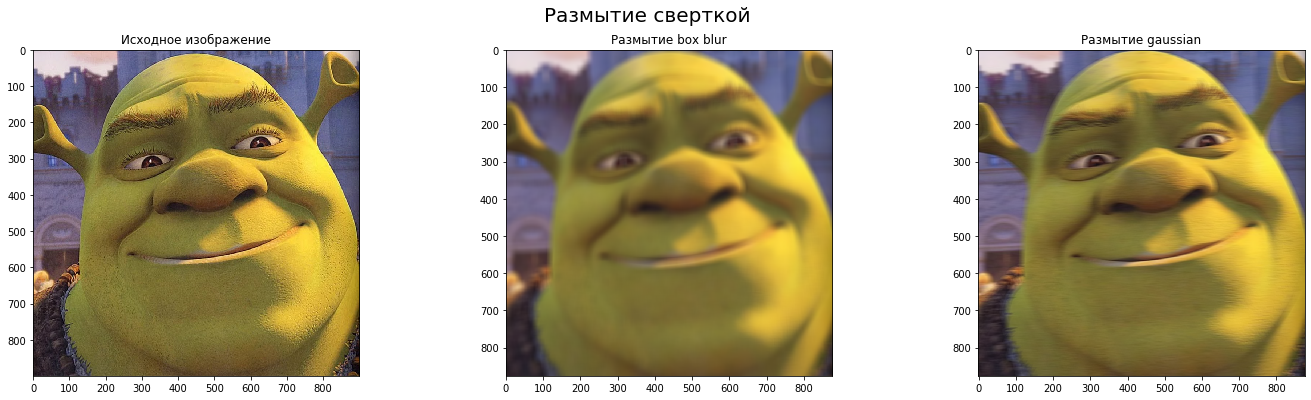

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Размытие сверткой', fontsize=20)

ax1.imshow(img)
ax1.set_title('Исходное изображение')

ax2.imshow(out_img_box)
ax2.set_title('Размытие box blur')

ax3.imshow(out_img_gaus)
ax3.set_title('Размытие gaussian');

## Поиск вертикальных границ

In [25]:
win_size = (3,3)

In [26]:
w = np.array([[-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])

In [27]:
w.shape

(3, 3)

In [28]:
out_img_borders = np.zeros(
                    (img.shape[0] - win_size[0] + 1,
                    img.shape[1] - win_size[1] + 1,
                    3),
                    dtype=np.float32)

In [29]:
for i in tqdm_notebook(range(out_img.shape[0])):
    for j in range(out_img.shape[1]):
        for c in range(3):
            x = img[i:i + win_size[0], j:j + win_size[1], c]
            out_img_borders[i,j,c] = np.sum(w * x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


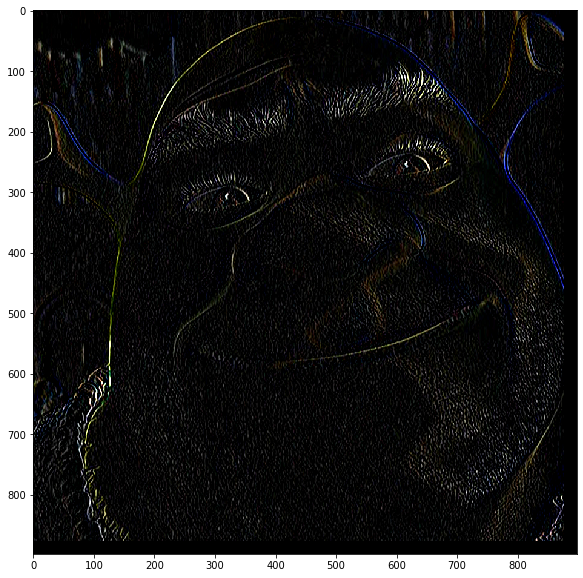

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(out_img_borders);